# Benchmarks for `ExpProp` on dense matrices (in-place)

In [1]:
using QuantumPropagators: ExpProp

In [2]:
import QuantumPropagators
import CSV
import DataFrames
using Plots
using QuantumControl: run_or_load

In [3]:
import PropagationBenchmarks
using PropagationBenchmarks: run_benchmarks, params, Vary
using PropagationBenchmarks: generate_exact_solution
using PropagationBenchmarks: calibrate_cheby
using PropagationBenchmarks: generate_trial_data, generate_timing_data
using PropagationBenchmarks: BenchmarkSeries
using PropagationBenchmarks:
    Units, plot_prec_runtimes, plot_size_runtime, plot_runtime, plot_scaling, plot_overhead

In [4]:
using AppleAccelerate #  no-op on non-Apple
PropagationBenchmarks.info()

Julia Version 1.11.1


Commit 8f5b7ca12ad (2024-10-16 10:53 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 64 × Intel(R) Xeon(R) Gold 6226R CPU @ 2.90GHz
  WORD_SIZE: 64
  LLVM: libLLVM-16.0.6 (ORCJIT, cascadelake)
Threads: 1 default, 0 interactive, 1 GC (on 64 virtual cores)
Environment:
  LD_LIBRARY_PATH = /home/goerz/.local/lib
  JULIA_NUM_THREADS = 1
  JULIA_PKG_PRESERVE_TIERED_INSTALLED = true
  NUMEXPR_NUM_THREADS = 1
  OPENBLAS_NUM_THREADS = 1
  VECLIB_MAXIMUM_THREADS = 1
  OMP_NUM_THREADS = 1
  MKL_NUM_THREADS = 1
BLAS Libraries:
  libopenblas64_.so [ilp64]
Packages:


  QuantumControl         : 0.11.1
  QuantumPropagators     : 0.8.3
  QuantumControlTestUtils: 0.3.1


In [5]:
projectdir(path...) = joinpath(@__DIR__, path...)
datadir(path...) = projectdir("data", "B02_01_ExpProp_InPlace_Dense", path...)
mkpath(datadir())

SYSTEMS_CACHE = Dict();
EXACT_SOLUTIONS_CACHE = Dict();
CALIBRATION_CACHE = Dict();

QuantumPropagators.disable_timings();

In [6]:
FORCE = (get(ENV, "FORCE", "0") in ["true", "1"])

false

## Runtime over System Size

In [7]:
SYSTEM_PARAMETERS = params(
    # see arguments of `random_dynamic_generator`
    N = Vary(5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100),
    spectral_envelope = 1.0,
    exact_spectral_envelope = true,
    number_of_controls = 1,
    density = 1,
    hermitian = true,
    dt = 1.0,
    nt = 1001,
);

In [8]:
BENCHMARK_PARAMETERS = params(method = ExpProp, inplace = true);

In [9]:
size_trial_data = run_or_load(datadir("benchmark_size_trials.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_trial_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

[ Info: File data/B02_01_ExpProp_InPlace_Dense/benchmark_size_trials.jld2 does not exist. Creating it now.


generate systems:  18%|██████                           |  ETA: 0:00:29

generate systems: 100%|█████████████████████████████████| Time: 0:00:06


benchmark:         18%|██████                           |  ETA: 0:02:00

benchmark:         27%|█████████                        |  ETA: 0:01:45

benchmark:         36%|████████████                     |  ETA: 0:01:32

benchmark:         45%|███████████████                  |  ETA: 0:01:18

benchmark:         55%|██████████████████               |  ETA: 0:01:06

benchmark:         64%|█████████████████████            |  ETA: 0:00:52

benchmark:         73%|████████████████████████         |  ETA: 0:00:39

benchmark:         82%|███████████████████████████      |  ETA: 0:00:26

benchmark:         91%|██████████████████████████████   |  ETA: 0:00:13

benchmark:        100%|█████████████████████████████████| Time: 0:02:23

In [10]:
QuantumPropagators.enable_timings();

size_timing_data = run_or_load(datadir("benchmark_size_timing.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = SYSTEM_PARAMETERS,
        benchmark_parameters = BENCHMARK_PARAMETERS,
        generate_benchmark = generate_timing_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

QuantumPropagators.disable_timings();

[ Info: File data/B02_01_ExpProp_InPlace_Dense/benchmark_size_timing.jld2 does not exist. Creating it now.


benchmark:         18%|██████                           |  ETA: 0:00:12

benchmark:         27%|█████████                        |  ETA: 0:00:12

benchmark:         36%|████████████                     |  ETA: 0:00:10

benchmark:         45%|███████████████                  |  ETA: 0:00:08

benchmark:         55%|██████████████████               |  ETA: 0:00:06

benchmark:         64%|█████████████████████            |  ETA: 0:00:04

benchmark:         73%|████████████████████████         |  ETA: 0:00:04

benchmark:         82%|███████████████████████████      |  ETA: 0:00:02

benchmark:        100%|█████████████████████████████████| Time: 0:00:11

In [11]:
size_runtime_data = merge(size_trial_data, size_timing_data)

Row,N,init_prop,propagate,timesteps,matrix_vector_products,percent
1,5,Trial(6.395 μs),Trial(9.984 ms),1000,1000,1.14837
2,10,Trial(6.451 μs),Trial(16.504 ms),1000,1000,0.691009
3,20,Trial(6.459 μs),Trial(47.882 ms),1000,1000,0.447518
4,30,Trial(6.508 μs),Trial(105.512 ms),1000,1000,0.390335
5,40,Trial(6.550 μs),Trial(191.220 ms),1000,1000,0.31085
6,50,Trial(6.533 μs),Trial(321.484 ms),1000,1000,0.314179
7,60,Trial(6.419 μs),Trial(480.335 ms),1000,1000,0.268907
8,70,Trial(6.678 μs),Trial(685.288 ms),1000,1000,0.276674
9,80,Trial(6.707 μs),Trial(913.409 ms),1000,1000,0.237694
10,90,Trial(6.693 μs),Trial(1.226 s),1000,1000,0.2376


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_ExpProp_InPlace_Dense/expprop_inplace_dense_runtime_size_high.csv


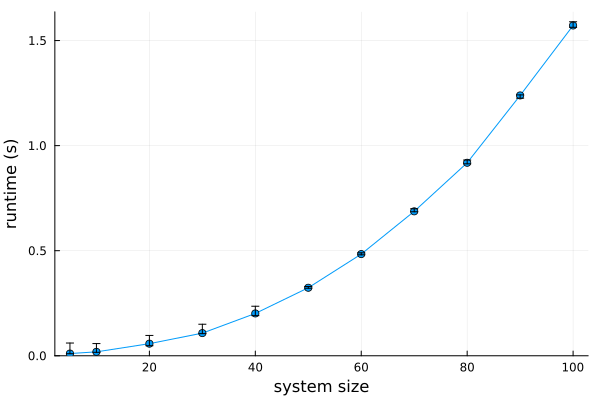

In [12]:
plot_size_runtime(
    size_runtime_data;
    csv = datadir("expprop_inplace_dense_runtime_size_{key}.csv")
) do row
    return :high
end

## Scaling with Spectral Envelope

For larger system sizes, the runtime of the propagation should be dominated by matrix-vector products. The number of matrix_vector products should depend only on the desired precision and the spectral envelope of the system (for `dt=1.0`; or alternatively, on `dt` if the spectral envelope is kept constant). We analyze here how the number of matrix-vector products scales with the spectral envelope for the default "high" precision (machine precision), and for lower precision (roughly half machine precision).

This scaling should be mostly independent of the size or the encoding of the system.

In [13]:
scaling_data = run_or_load(datadir("benchmark_scaling.jld2"); force = FORCE) do
    run_benchmarks(;
        system_parameters = params(
            N = 10,
            spectral_envelope = Vary(0.5, 1.0, 5.0, 10.0, 15.0, 20.0, 25.0),
            exact_spectral_envelope = true,
            number_of_controls = 1,
            density = 1,
            hermitian = true,
            dt = 1.0,
            nt = 1001,
        ),
        benchmark_parameters = params(method = ExpProp, inplace = true,),
        generate_benchmark = generate_trial_data,
        systems_cache = SYSTEMS_CACHE,
    )
end;

[ Info: File data/B02_01_ExpProp_InPlace_Dense/benchmark_scaling.jld2 does not exist. Creating it now.


benchmark:         29%|█████████▍                       |  ETA: 0:01:04

benchmark:         43%|██████████████▏                  |  ETA: 0:00:52

benchmark:         57%|██████████████████▉              |  ETA: 0:00:39

benchmark:         71%|███████████████████████▋         |  ETA: 0:00:25

benchmark:         86%|████████████████████████████▎    |  ETA: 0:00:13

benchmark:        100%|█████████████████████████████████| Time: 0:01:28

In [14]:
scaling_data

Row,spectral_envelope,init_prop,propagate
1,0.5,Trial(6.401 μs),Trial(15.733 ms)
2,1.0,Trial(6.488 μs),Trial(16.462 ms)
3,5.0,Trial(6.386 μs),Trial(18.358 ms)
4,10.0,Trial(6.395 μs),Trial(18.828 ms)
5,15.0,Trial(6.392 μs),Trial(19.113 ms)
6,20.0,Trial(6.446 μs),Trial(19.552 ms)
7,25.0,Trial(6.425 μs),Trial(19.649 ms)


[ Info: Written /home/goerz/Documents/Programming/JuliaQuantumControl/PropagationBenchmarks.jl/data/B02_01_ExpProp_InPlace_Dense/expprop_scaling_spectral_envelope.csv


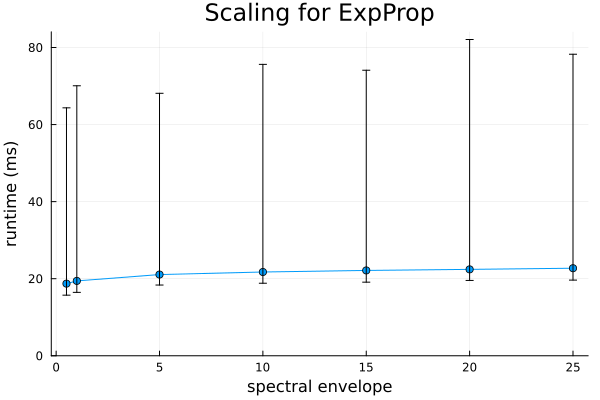

In [15]:
plot_runtime(
    scaling_data;
    x = :spectral_envelope,
    xlabel = "spectral envelope",
    plot_title = "Scaling for ExpProp",
    unit = :ms,
    csv = datadir("expprop_scaling_{key}.csv")
) do row
    return :spectral_envelope
end